In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import *
from sklearn import model_selection
from sklearn import ensemble
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns

#### Let's import the clean training dataset without the X, Y, Z columns

In [2]:
clean_training = pd.read_csv('clean_data/clean_train_final.csv')

In [16]:
clean_training.head()
print(clean_training.shape)

(40455, 8)


In [4]:
clean_training.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
clean_training.head()

,id,carat,cut,color,clarity,depth,table,price
0,0,0.30,3,3,5,62.8,56.0,605
1,1,0.34,1,2,6,62.6,55.0,565
2,2,0.40,3,1,6,60.3,62.0,720
3,3,0.40,2,5,4,61.8,59.2,793
4,4,0.90,3,1,6,61.0,63.0,4381


### Train Test Splitting

In [6]:
X = clean_training.drop(['price'],axis=1)
y = clean_training['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## First model: KneighborsRegressor

In [104]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [105]:
print('KNeighborsRegressor RMSE:', np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

KNeighborsRegressor RMSE: 4502.886254171785


(array([-2500.,     0.,  2500.,  5000.,  7500., 10000., 12500., 15000.,
        17500., 20000.]),
 <a list of 10 Text major ticklabel objects>)

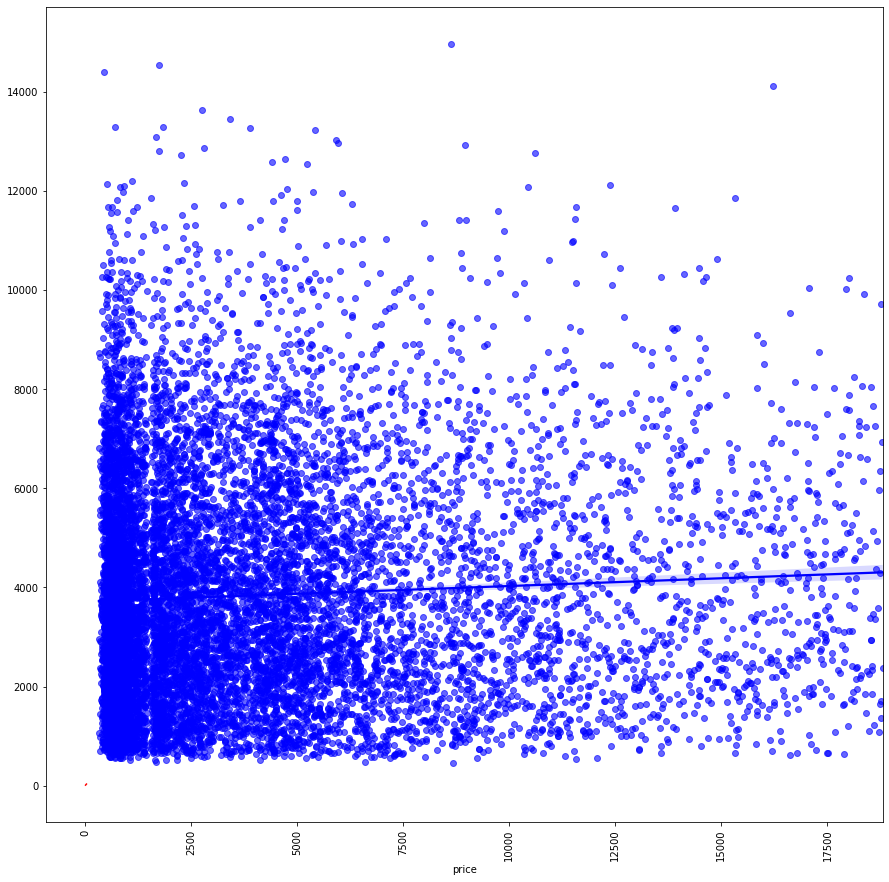

In [112]:
plt.figure(figsize=(15,15))
sns.regplot(y_test, model.predict(X_test), color='blue', scatter_kws={'alpha':0.6}, fit_reg=True)
sns.lineplot([12, 33], [12, 33], color='red')
plt.xticks( rotation=90)

This clearly does not work...

## Second Model Random Forest Regressor

In [107]:
model2 = RandomForestRegressor(n_estimators=600, max_depth=20, min_samples_leaf=3, random_state=111)
selector = RFECV(model2, step=1, cv=5)
model2.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=3, n_estimators=600,
                      random_state=111)

In [108]:
print('Random forest RMSE:', np.sqrt(mean_squared_error(y_test, model2.predict(X_test))))

Random forest RMSE: 552.8971142084284


(array([-2500.,     0.,  2500.,  5000.,  7500., 10000., 12500., 15000.,
        17500., 20000.]),
 <a list of 10 Text major ticklabel objects>)

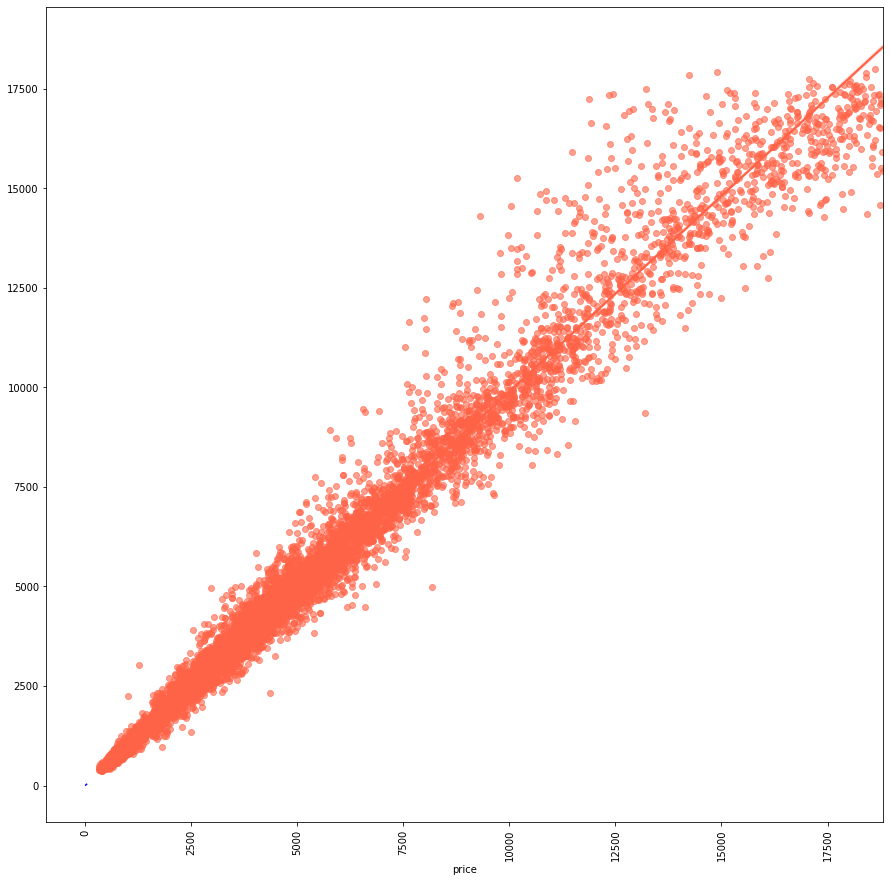

In [111]:
plt.figure(figsize=(15,15))
sns.regplot(y_test, model2.predict(X_test), color='tomato', scatter_kws={'alpha':0.6}, fit_reg=True)
sns.lineplot([12, 33], [12, 33], color='blue')
plt.xticks( rotation=90)

This is a much better model...

## Third Model: Gradient Boosting Regression

In [94]:
params = {'n_estimators': 740, 'max_depth': 8, 'min_samples_split': 300, 'min_samples_leaf':9,
          'learning_rate': 0.01, 'loss': 'ls'}

model3 = ensemble.GradientBoostingRegressor(**params)

model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)

In [95]:
print("GBR RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

GBR RMSE: 529.618791306855


(array([-2500.,     0.,  2500.,  5000.,  7500., 10000., 12500., 15000.,
        17500., 20000.]),
 <a list of 10 Text major ticklabel objects>)

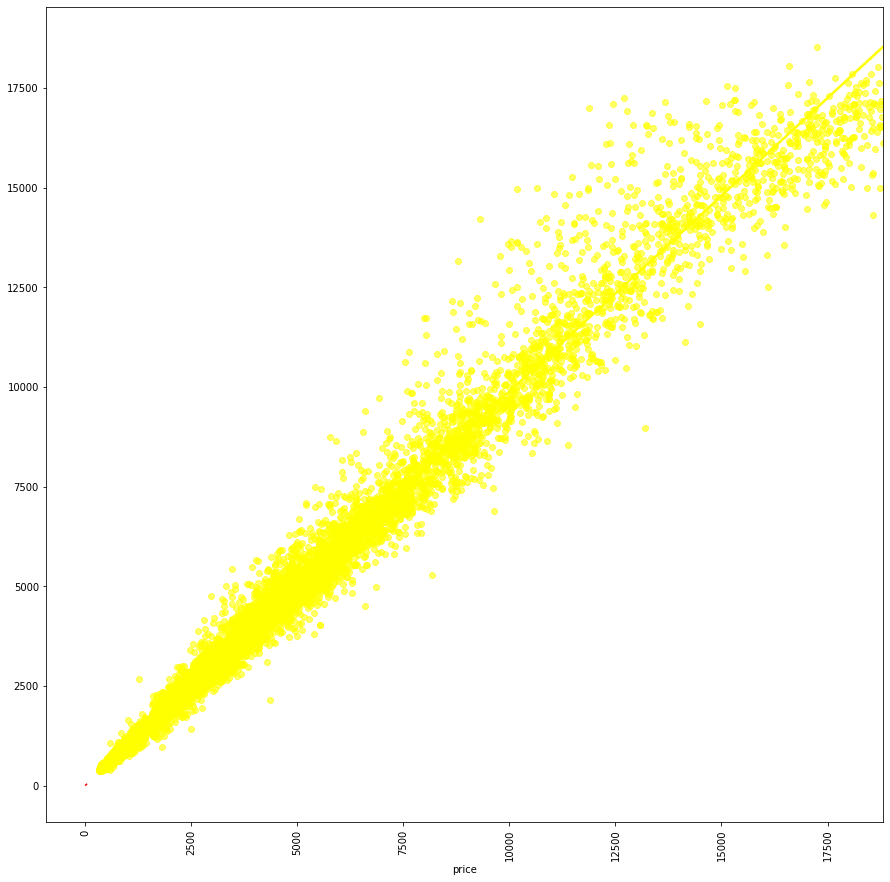

In [114]:
plt.figure(figsize=(15,15))
sns.regplot(y_test, model3.predict(X_test), color='yellow', scatter_kws={'alpha':0.6}, fit_reg=True)
sns.lineplot([12, 33], [12, 33], color='red')
plt.xticks( rotation=90)

## We see the best fitting model is Gradient Boosting Regressor

It has the lowest MSE so let's use it. 

Let's import the clean predict dataset

In [97]:
clean_predict = pd.read_csv('clean_data/clean_predict_final.csv')

In [98]:
clean_predict.head()

,Unnamed: 0,id,carat,cut,color,clarity,depth,table
0,0,0,2.36,1,6,7,60.8,54.0
1,1,1,2.04,1,5,7,62.0,56.0
2,2,2,0.51,1,6,6,61.7,54.0
3,3,3,0.30,1,6,6,61.3,56.0
4,4,4,0.96,5,5,5,68.8,56.0


In [99]:
clean_predict.drop(['Unnamed: 0'],axis=1,inplace=True)

Let's predict the price and add it as a column

In [100]:
price = model3.predict(clean_predict)

In [101]:
clean_predict["price"] = price

Now let's create a DataFrame with the needed columns to submit to kaggle

In [102]:
kaggle = clean_predict[['id',"price"]]
kaggle.head()

,id,price
0,0,15739.448230
1,1,14854.198538
2,2,1047.723076
3,3,442.228217
4,4,3478.487161


In [103]:
kaggle.to_csv("ready_to_submit/kaggle_submission.csv", index=False)

Let's Do it for another model to see how it goes

In [46]:
clean_predict1 = pd.read_csv('clean_data/clean_predict_final.csv')

In [49]:
clean_predict1.drop(['Unnamed: 0'],axis=1,inplace=True)

In [51]:
price1 = model2.predict(clean_predict1)

In [54]:
clean_predict1["price"] = price

In [55]:
kaggle1 = clean_predict1[['id',"price"]]
kaggle1.head()

,id,price
0,0,15646.333714
1,1,15104.516006
2,2,984.419819
3,3,448.802700
4,4,3888.616060


In [56]:
kaggle1.to_csv("ready_to_submit/kaggle_submission1.csv", index=False)